# 2.1. Problem Statement: Machine Learning 7

In [1]:
'''
In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("nba_2013.csv")

In [3]:
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
data.shape

(481, 31)

In [5]:
data.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [6]:
data.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [7]:
data.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

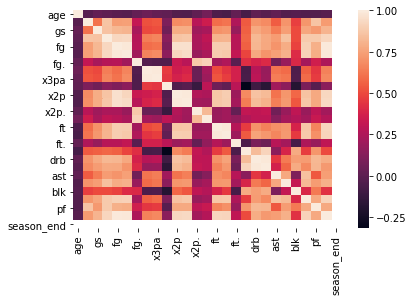

In [8]:
sns.heatmap(data.corr())
plt.show()

In [9]:
# convert objects to numeric
data = data.convert_objects(convert_numeric=True).dropna()

C:\Users\Dikshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [10]:
data.isnull().any().sum()

0

In [11]:
data.duplicated().any().sum()

0

In [12]:
data.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [13]:
data1 = data.drop(['player','pos','bref_team_id','season'],axis=1)

In [14]:
data1.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,72,144,216,28,23,26,30,122,171,2013
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,32,230,262,248,35,3,146,136,1330,2013
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,94,183,277,40,23,46,63,187,328,2013
6,28,69,69,2498,652,1423,0.458,3,15,0.200000,...,166,599,765,178,63,68,123,147,1603,2013
7,24,65,2,1072,134,300,0.447,2,13,0.153846,...,119,192,311,71,24,33,44,126,303,2013


In [15]:
from sklearn.neighbors import KNeighborsRegressor
X =  data1.drop('pts',axis=1)
y = data1['pts']

In [16]:
# divide the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 5)

In [17]:
# creating the knn model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [18]:
predictions = knn.predict(X_test)

In [19]:
print("predictions[:5]:\n", predictions)

predictions[:5]:
 [  78.6  350.8   37.6  699.6  175.4  691.   800.4  426.2  194.  1382.8
   64.4   29.2  810.4 1177.4 1353.8  443.2   90.4  222.8  200.6  935.
 1417.4 1100.   104.8  286.4  331.6   64.6  650.8  616.6  346.   694.
   21.4 1137.2 1021.   759.2 1157.2 1420.8  341.   286.8  442.2  592.
  338.2  122.    82.6  593.8 1116.6  836.4  360.4 1050.2   72.8   87.4
 1215.6  716.  1179.6 1816.2  490.2  644.8  800.6  682.6  784.   253.4
  618.2  153.    64.8  494.2  184.2  203.6  114.6  945.4  170.6  183.2
 1036.2 1058.   453.2  787.4  394.   114.6  739.   127.8  553.8  617.4
  523.8]


In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
error = sqrt(mean_squared_error(y_test,predictions))
print(error)

75.5206422602947


In [21]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 95.0098760298627
RMSE value for k=  2 is: 74.868238168263
RMSE value for k=  3 is: 77.05514388347223
RMSE value for k=  4 is: 75.46576057072849
RMSE value for k=  5 is: 75.5206422602947
RMSE value for k=  6 is: 74.83111529428487
RMSE value for k=  7 is: 74.37265635367301
RMSE value for k=  8 is: 75.0910352854914
RMSE value for k=  9 is: 76.01056709440944
RMSE value for k=  10 is: 75.58868636358775
RMSE value for k=  11 is: 74.6306362300061
RMSE value for k=  12 is: 76.13458962463372
RMSE value for k=  13 is: 76.40673188299549
RMSE value for k=  14 is: 77.66917344677532
RMSE value for k=  15 is: 78.60864010425176
RMSE value for k=  16 is: 81.85562983572034
RMSE value for k=  17 is: 83.68736433778776
RMSE value for k=  18 is: 84.1992050718744
RMSE value for k=  19 is: 84.01309417680251
RMSE value for k=  20 is: 83.70709662084425


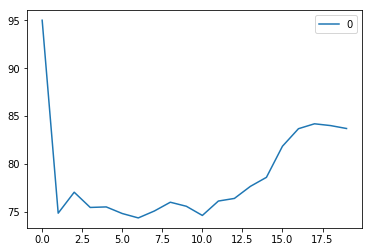

In [22]:
# plotting the rmse values against the k value
curve = pd.DataFrame(rmse_val)
curve.plot()

In [23]:
# Implementing GridsearchCV
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()
model = GridSearchCV(knn,params,cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 5}